## Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.layers import Dense,Conv2D, MaxPooling2D,Flatten
from tensorflow.keras.models import Sequential
import seaborn as sns
from tensorflow.keras.datasets import cifar10
from sklearn.metrics import confusion_matrix, classification_report

## Download & Prepare the CIFAR-10 Dataset

In [2]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


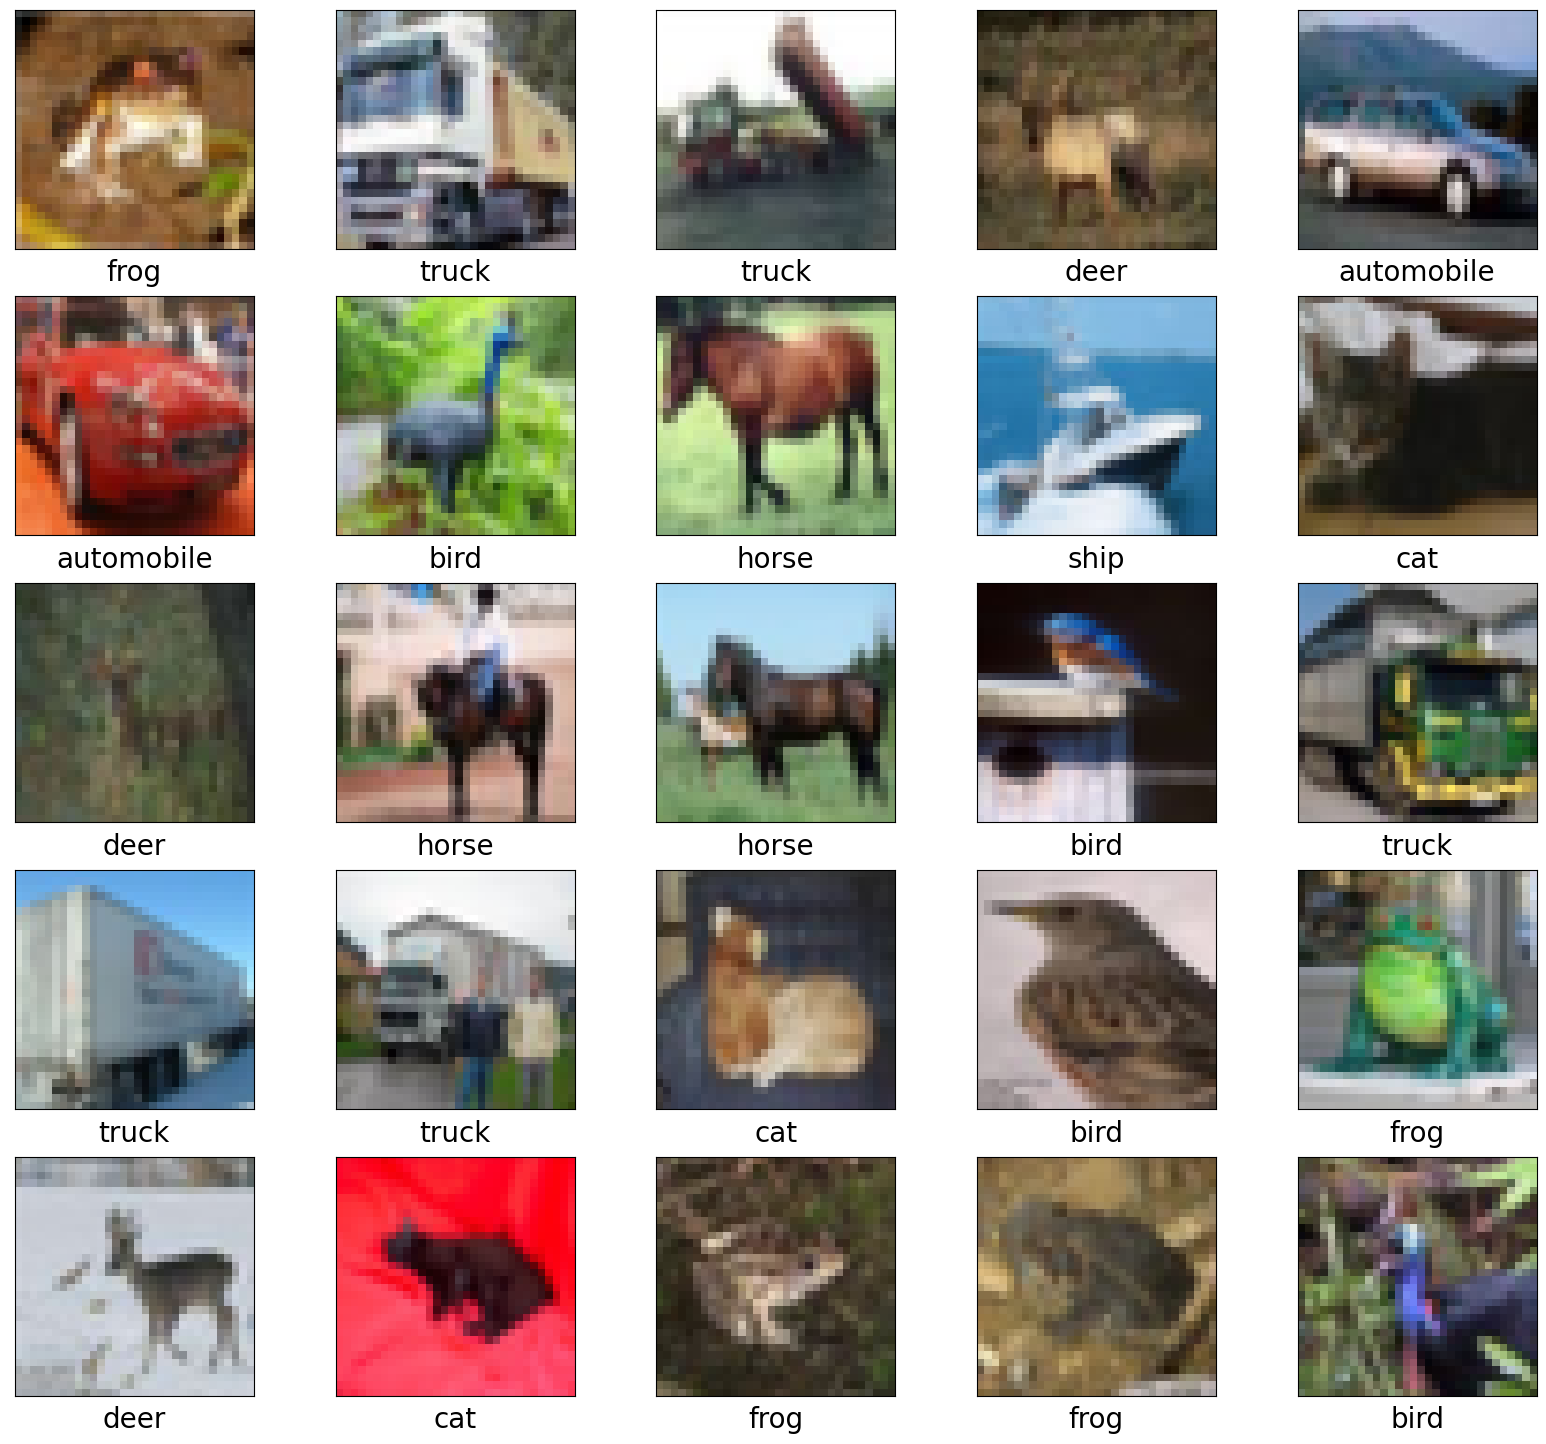

In [3]:
plt.figure(figsize=(20,18))
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.xlabel(class_names[y_train[i][0]],fontsize=20,loc='center')
plt.show()

##  Create the convolutional base,compiling & training a model

In [4]:
x_train=x_train[:5000,:,:]
x_test=x_test[:1000,:,:]
y_train=y_train[:5000,:]
y_test=y_test[:1000,:]

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(5000, 32, 32, 3)
(5000, 1)
(1000, 32, 32, 3)
(1000, 1)


In [5]:
x_train = x_train/255.0
x_test = x_test/255.0


In [6]:
model=Sequential()

model.add(Conv2D(64,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 256)         295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 256)        0

In [8]:
h=model.fit(x_train,y_train,epochs=25,validation_data=(x_test,y_test))

Epoch 1/25
157/157 [==============================] - 8s 42ms/step - loss: 2.0594 - acc: 0.2220 - val_loss: 1.8454 - val_acc: 0.3300
Epoch 2/25
157/157 [==============================] - 7s 42ms/step - loss: 1.7157 - acc: 0.3728 - val_loss: 1.6145 - val_acc: 0.4120
Epoch 3/25
157/157 [==============================] - 8s 48ms/step - loss: 1.5525 - acc: 0.4436 - val_loss: 1.5815 - val_acc: 0.4460
Epoch 4/25
157/157 [==============================] - 8s 48ms/step - loss: 1.4042 - acc: 0.4944 - val_loss: 1.4770 - val_acc: 0.4790
Epoch 5/25
157/157 [==============================] - 8s 48ms/step - loss: 1.2809 - acc: 0.5372 - val_loss: 1.3865 - val_acc: 0.5020
Epoch 6/25
157/157 [==============================] - 7s 46ms/step - loss: 1.1764 - acc: 0.5814 - val_loss: 1.3671 - val_acc: 0.5230
Epoch 7/25
157/157 [==============================] - 7s 46ms/step - loss: 1.0509 - acc: 0.6274 - val_loss: 1.3718 - val_acc: 0.5190
Epoch 8/25
157/157 [==============================] - 7s 47ms/step - 

In [9]:
df=pd.DataFrame(h.history)
df['Epochs']=h.epoch
df

,loss,acc,val_loss,val_acc,Epochs
0,2.059419,0.2220,1.845443,0.330,0
1,1.715730,0.3728,1.614495,0.412,1
2,1.552528,0.4436,1.581495,0.446,2
3,1.404151,0.4944,1.476986,0.479,3
4,1.280909,0.5372,1.386494,0.502,4
5,1.176433,0.5814,1.367146,0.523,5
6,1.050902,0.6274,1.371752,0.519,6
7,0.937662,0.6688,1.257418,0.566,7
8,0.835614,0.7130,1.311192,0.569,8
9,0.705007,0.7552,1.353703,0.563,9


##  Data Analysis and Visulizations

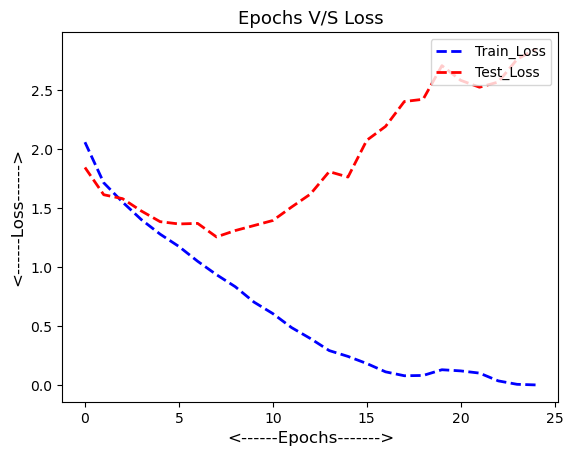

In [10]:
plt.plot(df['Epochs'],df['loss'],'b--',linewidth=2,label='Train_Loss')
plt.plot(df['Epochs'],df['val_loss'],'r--',linewidth=2,label='Test_Loss')

plt.title("Epochs V/S Loss",fontsize=13)

plt.xlabel('<------Epochs------->',fontsize=12)
plt.ylabel('<------Loss------>',fontsize=12)

plt.legend(loc='upper right')

plt.show()

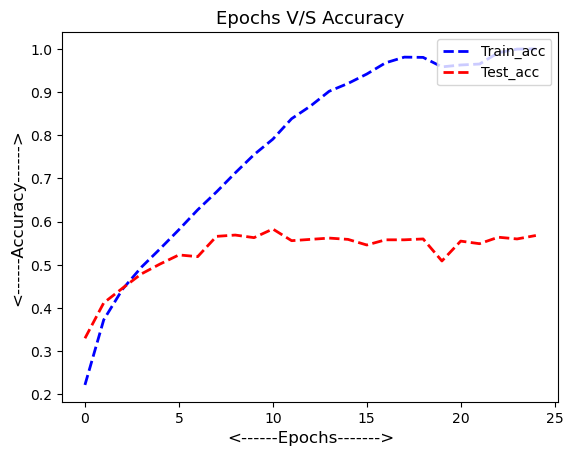

In [11]:
plt.plot(df['Epochs'],df['acc'],'b--',linewidth=2,label='Train_acc')
plt.plot(df['Epochs'],df['val_acc'],'r--',linewidth=2,label='Test_acc')

plt.title("Epochs V/S Accuracy",fontsize=13)

plt.xlabel('<------Epochs------->',fontsize=12)
plt.ylabel('<------Accuracy------>',fontsize=12)

plt.legend(loc='upper right')

plt.show()

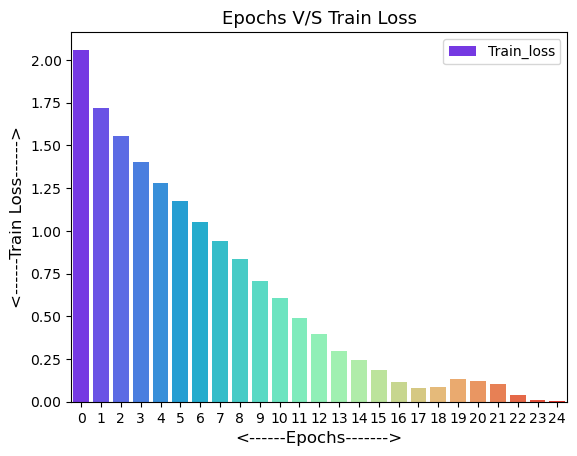

In [12]:
sns.barplot(x='Epochs',y='loss',data=df,orient='v',palette='rainbow',label='Train_loss')

plt.title("Epochs V/S Train Loss",fontsize=13)

plt.xlabel('<------Epochs------->',fontsize=12)
plt.ylabel('<------Train Loss------>',fontsize=12)

plt.legend(loc='upper right')
plt.show()

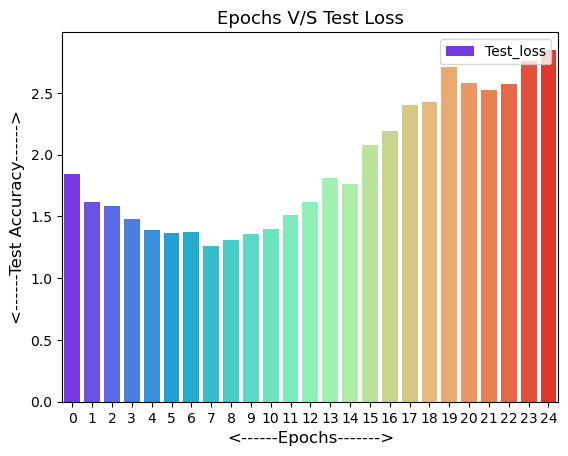

In [13]:
sns.barplot(x='Epochs',y='val_loss',data=df,orient='v', palette='rainbow',label='Test_loss')

plt.title("Epochs V/S Test Loss",fontsize=13)

plt.xlabel('<------Epochs------->',fontsize=12)
plt.ylabel('<------Test Accuracy------>',fontsize=12)

plt.legend(loc='upper right')
plt.show()

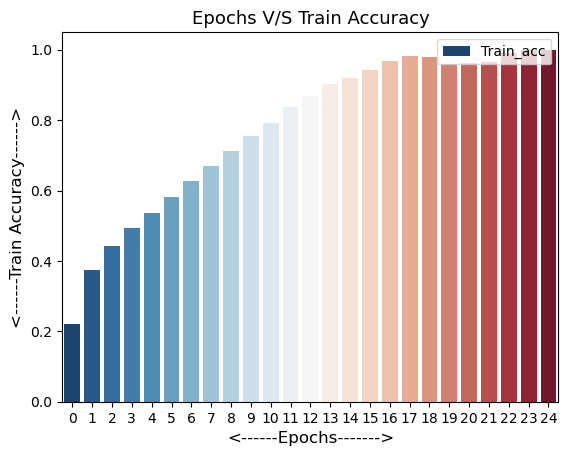

In [14]:
sns.barplot(x='Epochs',y='acc',data=df,orient='v', palette='RdBu_r',label='Train_acc')

plt.title("Epochs V/S Train Accuracy",fontsize=13)

plt.xlabel('<------Epochs------->',fontsize=12)
plt.ylabel('<------Train Accuracy------>',fontsize=12)

plt.legend(loc='upper right')
plt.show()

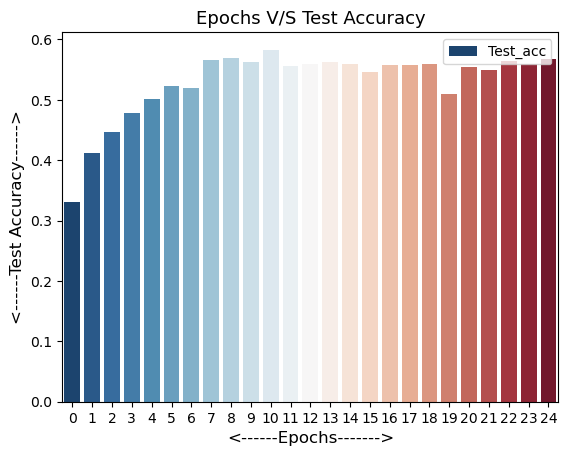

In [15]:
sns.barplot(x='Epochs',y='val_acc',data=df,orient='v', palette='RdBu_r',label='Test_acc')

plt.title("Epochs V/S Test Accuracy",fontsize=13)

plt.xlabel('<------Epochs------->',fontsize=12)
plt.ylabel('<------Test Accuracy------>',fontsize=12)

plt.legend(loc='upper right')
plt.show()

## Compute  Confusion matrix and classification report

In [16]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

32/32 - 0s - loss: 2.8494 - acc: 0.5680 - 345ms/epoch - 11ms/step


In [17]:
# Plotting confusion matrix

import itertools
plt.rcParams['figure.figsize'] = [10,7]

def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):

      if normalize:
          cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
          print("\nNormalized confusion matrix:\n")
      else:
          print('\nConfusion matrix, without normalization :\n')

      print(cm)

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

print("\nClassification Report : \n")
print(classification_report(y_test, p_test))


32/32 [==============================] - 1s 11ms/step

Confusion matrix, without normalization :

[[57  1  7  2  4  2  3  3 18  6]
 [ 5 67  0  2  2  1  0  1  3  8]
 [12  1 45 11  6  7 12  1  4  1]
 [ 5  3 11 36 11 18  7  6  2  4]
 [ 5  0 13  6 36  4  6 16  2  2]
 [ 1  0 12 20  5 34  4  9  1  0]
 [ 0  6  6 10 10  3 74  2  0  1]
 [ 2  0  2  8 12  8  1 67  2  0]
 [16  4  2  2  2  1  1  2 75  1]
 [ 5  9  2  3  0  2  1  3  7 77]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.53      0.55      0.54       103
           1       0.74      0.75      0.74        89
           2       0.45      0.45      0.45       100
           3       0.36      0.35      0.35       103
           4       0.41      0.40      0.40        90
           5       0.42      0.40      0.41        86
           6       0.68      0.66      0.67       112
           7       0.61      0.66      0.63       102
           8       0.66      0.71      0.68       106
   

In [19]:
print(test_acc)

0.5680000185966492
